# 9.1 matplotlib API入门

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

<IPython.core.display.Javascript object>


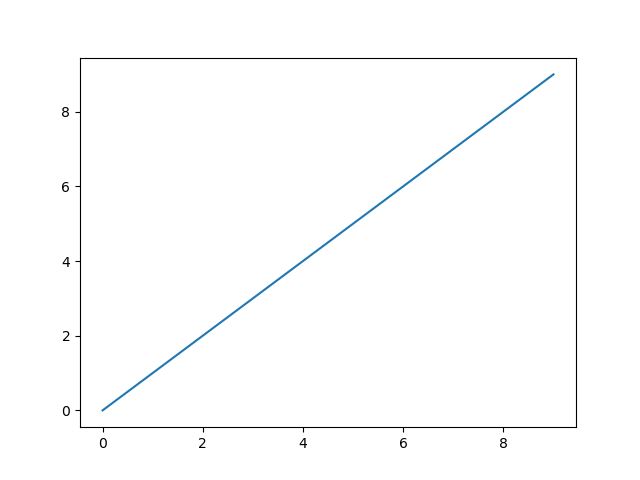

In [5]:
data=np.arange(10)
plt.plot(data)

## Figure和Subplot
matplotlib的图像都位于Figure对象中。你可以用plt.figure创建一个新的Figure,不能通过空Figure绘图。必须用add_subplot创建一个或多个subplot才行,这条代码的意思是：图像应该是2×2的（即最多4张图），且当前选中的是4个subplot中的第一个（编号从1开始）。如果再把后面两个subplot也创建出来，最终得到的图像如下图所示：

如果这时执行一条绘图命令，matplotlib就会在最后一个用过的subplot（如果没有则创建一个）上进行绘制

<IPython.core.display.Javascript object>


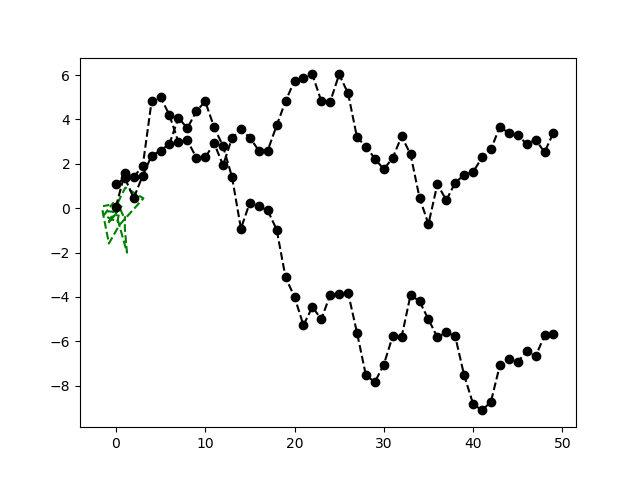

In [16]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(),'k--')

"k--"是一个线型选项，用于告诉matplotlib绘制黑色虚线图。上面那些由fig.add_subplot所返回的对象是AxesSubplot对象，直接调用它们的实例方法就可以在其它空着的格子里面画图了

<IPython.core.display.Javascript object>


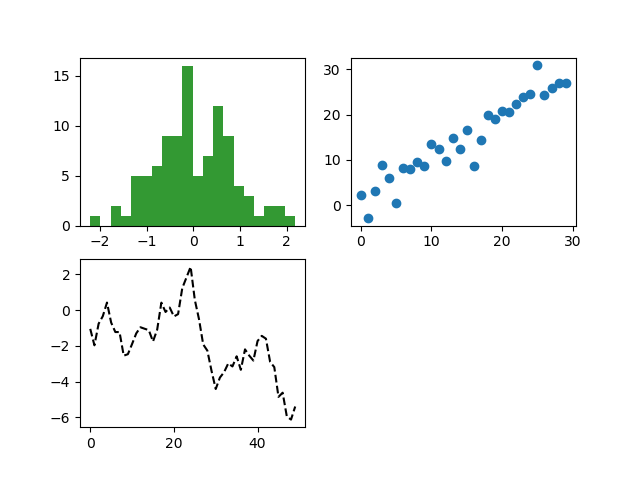

In [19]:
fig=plt.figure()
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
plt.plot(np.random.randn(50).cumsum(),'k--')
ax1.hist(np.random.randn(100),bins=20,color='g',alpha=0.8)
ax2.scatter(np.arange(30),np.arange(30)+3*np.random.randn(30))

创建包含subplot网格的figure是一个非常常见的任务，matplotlib有一个更为方便的方法plt.subplots，它可以创建一个新的Figure，并返回一个含有已创建的subplot对象的NumPy数组：

这是非常实用的，因为可以轻松地对axes数组进行索引，就好像是一个二维数组一样，例如axes[0,1]。你还可以通过sharex和sharey指定subplot应该具有相同的X轴或Y轴。在比较相同范围的数据时，这也是非常实用的，否则，matplotlib会自动缩放各图表的界限。

<IPython.core.display.Javascript object>


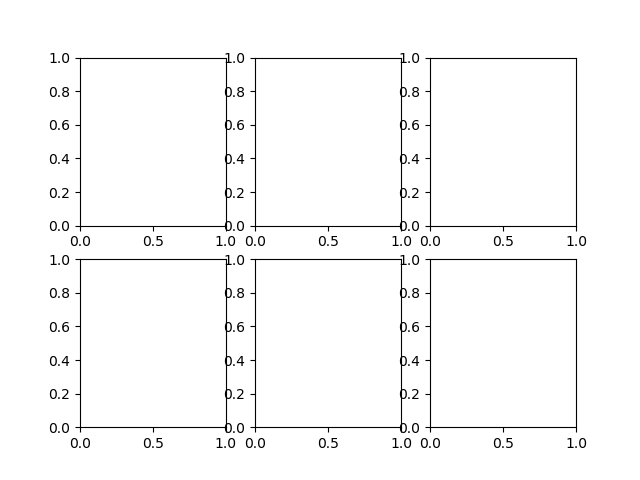

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C3E0400>,
      dtype=object)

In [21]:
fig,axes=plt.subplots(2,3)
axes

## 调整subplot周围的间距
默认情况下，matplotlib会在subplot外围留下一定的边距，并在subplot之间留下一定的间距。间距跟图像的高度和宽度有关，因此，如果你调整了图像大小（不管是编程还是手工），间距也会自动调整。利用Figure的subplots_adjust方法可以轻而易举地修改间距

wspace和hspace用于控制宽度和高度的百分比，可以用作subplot之间的间距。下面是一个简单的例子，其中我将间距收缩到了0

<IPython.core.display.Javascript object>


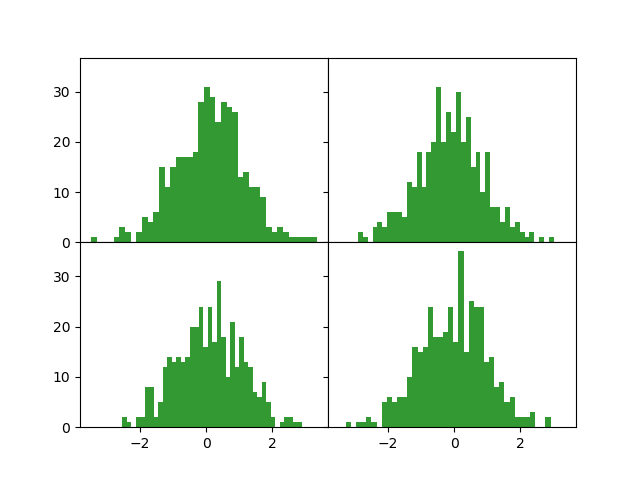

In [23]:
fig,axes=plt.subplots(2,2,sharex=True,sharey=True)
for i in range(2):
    for j in range(2):
        axes[i,j].hist(np.random.randn(400),bins=40,color='g',alpha=0.8)
plt.subplots_adjust(wspace=0,hspace=0)

## 颜色、标记和线型
matplotlib的plot函数接受一组X和Y坐标，还可以接受一个表示颜色和线型的字符串缩写。例如，要根据x和y绘制绿色虚线，你可以执行如下代码：

<IPython.core.display.Javascript object>


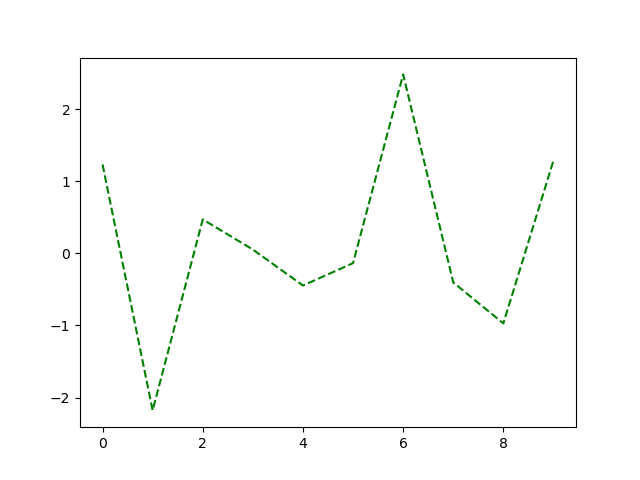

In [29]:
plt.figure()
ax=plt.subplot(1,1,1)
x=np.arange(10)
y=np.random.randn(10)
ax.plot(x,y,'g--')

通过下面这种更为明确的方式也能得到同样的效果：

<IPython.core.display.Javascript object>


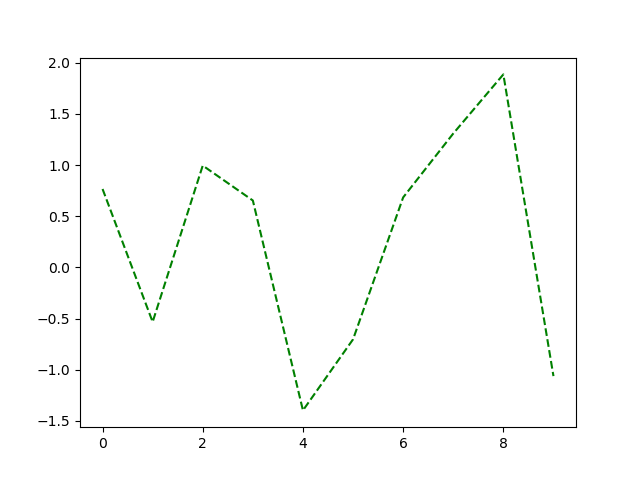

In [30]:
plt.figure()
ax=plt.subplot(1,1,1)
ax.plot(range(10),np.random.randn(10),linestyle='--',color='g')

线图可以使用标记强调数据点。因为matplotlib可以创建连续线图，在点之间进行插值，因此有时可能不太容易看出真实数据点的位置。标记也可以放到格式字符串中，但标记类型和线型必须放在颜色后面（见图9-6）：

<IPython.core.display.Javascript object>


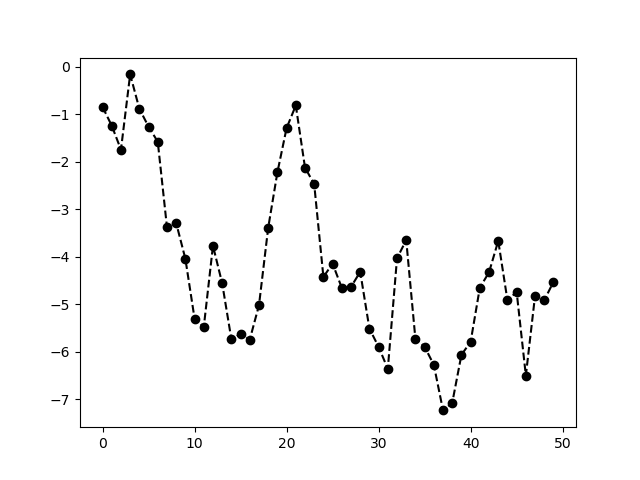

In [33]:
plt.figure()
plt.plot(np.random.randn(50).cumsum(),'ko--')

还可以将其写成更为明确的形式：

<IPython.core.display.Javascript object>


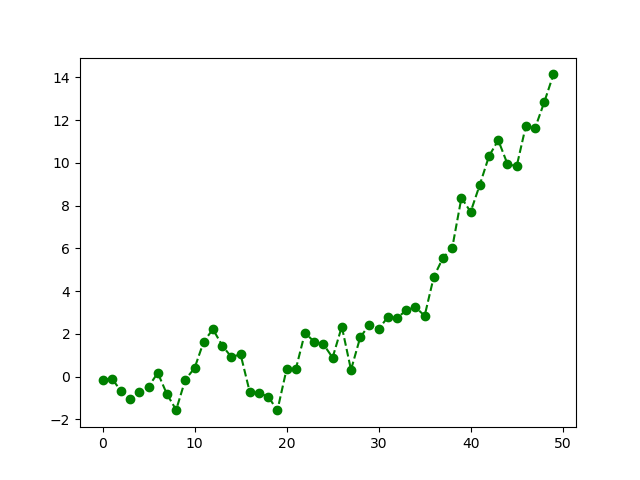

In [35]:
plt.figure()
plt.plot(np.random.randn(50).cumsum(),linestyle='--',color='g',marker='o')

在线型图中，非实际数据点默认是按线性方式插值的。可以通过drawstyle选项修改

<IPython.core.display.Javascript object>


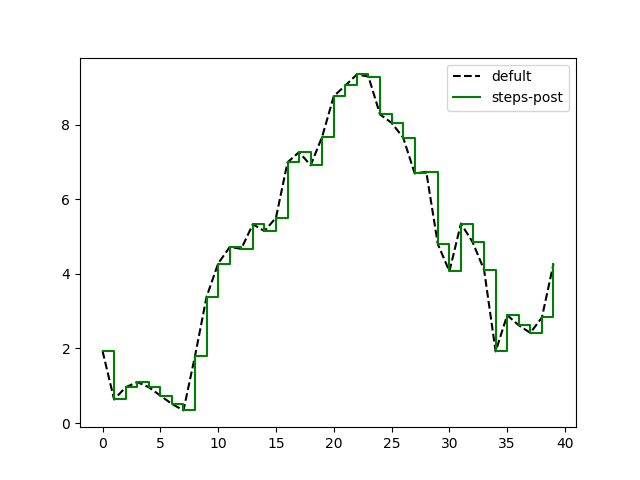

In [37]:
data=np.random.randn(40).cumsum()
plt.figure()
plt.plot(data,'k--',label='defult')
plt.plot(data,'g-',label='steps-post',drawstyle='steps-post')
plt.legend(loc='best')

## 设置标题、轴标签、刻度以及刻度标签
要改变x轴刻度，最简单的办法是使用set_xticks和set_xticklabels。前者告诉matplotlib要将刻度放在数据范围中的哪些位置，默认情况下，这些位置也就是刻度标签。但我们可以通过set_xticklabels将任何其他的值用作标签,rotation选项设定x刻度标签倾斜30度。最后，再用set_xlabel为X轴设置一个名称，并用set_title设置一个标题

<IPython.core.display.Javascript object>


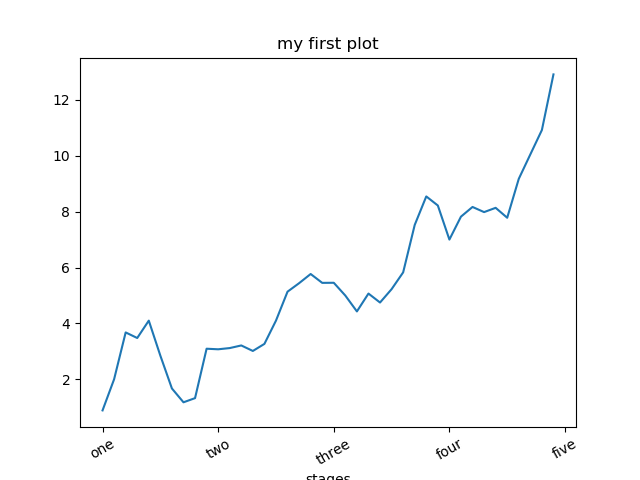

Text(0.5,1,'my first plot')

In [39]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(40).cumsum())
ax.set_xticks([0,10,20,30,40])
ax.set_xticklabels(['one','two','three','four','five'],rotation=30,fontsize=10)
ax.set_xlabel('stages')
ax.set_title('my first plot')

## 添加图例
图例（legend）是另一种用于标识图表元素的重要工具。添加图例的方式有多种。最简单的是在添加subplot的时候传入label参数,在此之后，你可以调用ax.legend()或plt.legend()来自动创建图例

<IPython.core.display.Javascript object>


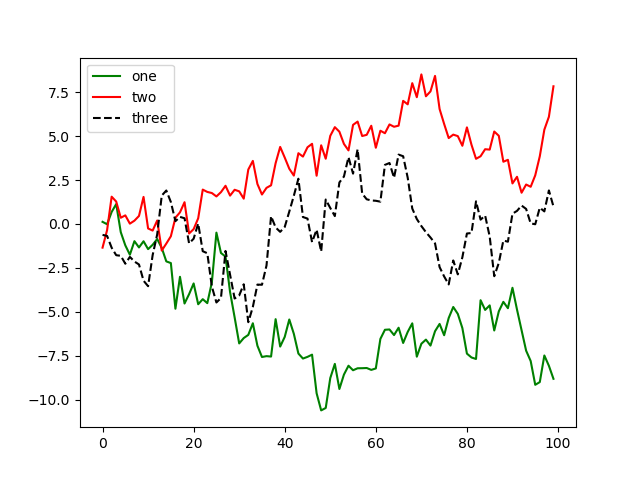

In [43]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.plot(np.random.randn(100).cumsum(),'g',label='one')
ax.plot(np.random.randn(100).cumsum(),'r-',label='two')
ax.plot(np.random.randn(100).cumsum(),'k--',label='three')
ax.legend(loc='best')